In [1]:
#import csv

#with open('data.csv', 'r') as csvfile:
    #reader = csv.reader(csvfile)
    
import pandas as pd
import numpy as np

    
df = pd.read_csv("data.csv")
    #display 
df.info()




df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [ ]:
#checking for empty cells
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [3]:
#check wrong formats
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [ ]:
#check for no numeric values in  numeric columns
#wrong data
#check neg values
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
  if(df[col]<0).any():
      print(f"negative values found in column:{col}")


In [8]:
#duplicates
duplicates_all = df[df.duplicated()]
print("Entire duplicate rows:")
print(duplicates_all)


Entire duplicate rows:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [ ]:
#recommendations for cleaning
#handle empty values
#convert wrong formats
#correct wrong data
# remove duplicates

In [ ]:
#fill empty values
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5904\2188251705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [10]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [11]:
print("shape of the dataset",df.shape)

shape of the dataset (169, 4)


In [12]:
#summary of stat
print("summary of statistics")
df.describe()

summary of statistics


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Calories distribution')

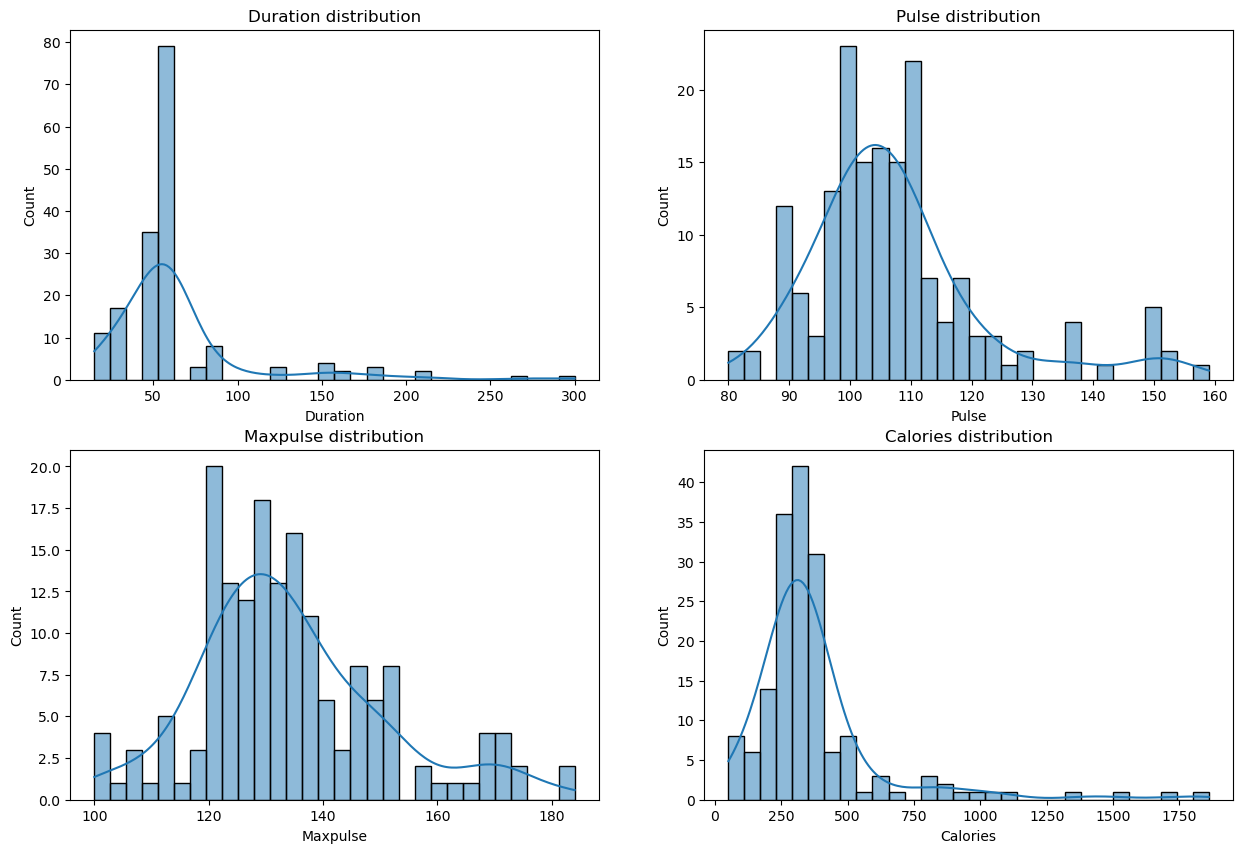

In [21]:
#histogram of Duration
#set 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Duration'], bins=30,kde =True)
plt.title("Duration distribution")

plt.subplot(2,2,2)
sns.histplot(df['Pulse'], bins=30,kde =True)
plt.title("Pulse distribution")

plt.subplot(2,2,3)
sns.histplot(df['Maxpulse'], bins=30,kde =True)
plt.title("Maxpulse distribution")

plt.subplot(2,2,4)
sns.histplot(df['Calories'], bins=30,kde =True)
plt.title("Calories distribution")







Text(0.5, 1.0, 'Maxpulse vs Calories')

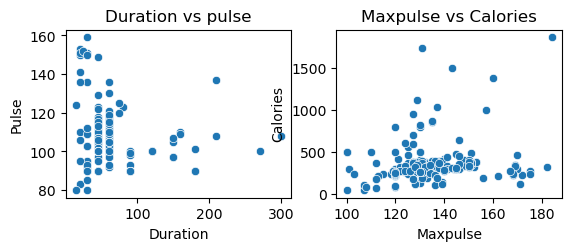

In [23]:
#scatter plot for maxpulse vs calories
plt.subplot(2,2,1)
sns.scatterplot(x='Duration',y='Pulse', data=df)
plt.title('Duration vs pulse')

plt.subplot(2,2,2)
sns.scatterplot(x='Maxpulse',y='Calories', data=df)
plt.title('Maxpulse vs Calories')


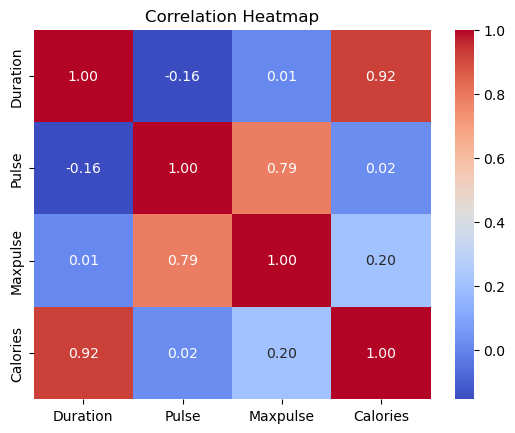

In [19]:
#correlation heatmap
corr =df.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()